In [3]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

In [93]:
df= pd.read_csv('monatszahlen2307_verkehrsunfaelle_10_07_23_nosum.csv')

In [18]:
df

,Category,Type,Year,Month,Value,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT
0,Alkoholunfälle,insgesamt,2023,202301,NaN,NaN,NaN,NaN,NaN
1,Alkoholunfälle,insgesamt,2023,202302,NaN,NaN,NaN,NaN,NaN
2,Alkoholunfälle,insgesamt,2023,202303,NaN,NaN,NaN,NaN,NaN
3,Alkoholunfälle,insgesamt,2023,202304,NaN,NaN,NaN,NaN,NaN
4,Alkoholunfälle,insgesamt,2023,202305,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2011,Verkehrsunfälle,Verletzte und Getötete,2000,200008,647.0,NaN,-13.04,NaN,584.0
2012,Verkehrsunfälle,Verletzte und Getötete,2000,200009,675.0,NaN,4.33,NaN,594.0
2013,Verkehrsunfälle,Verletzte und Getötete,2000,200010,615.0,NaN,-8.89,NaN,596.0
2014,Verkehrsunfälle,Verletzte und Getötete,2000,200011,578.0,NaN,-6.02,NaN,594.0


# Data Visualization

In [126]:
df['Month_only'] = extract_month(df)



In [145]:
agg_month=df.groupby(['Month_only']).sum().reset_index()

agg_year=  df.groupby(['Year']).sum().reset_index()

No handles with labels found to put in legend.


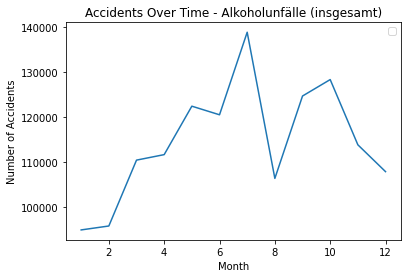

In [143]:
plt.plot( agg_month['Month_only'], agg_month['Value'])
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.title(f'Accidents Over Time - {category} ({accident_type})')
plt.legend()
plt.show()

from the graph. we can see the most danger month is July

No handles with labels found to put in legend.


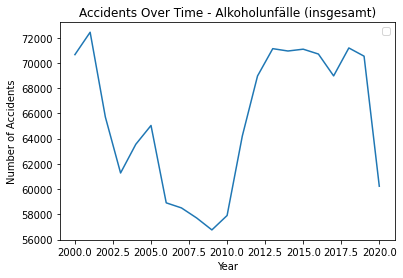

In [149]:
plt.plot( agg_year['Year'], agg_year['Value'])
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.title(f'Accidents Over Time - {category} ({accident_type})')
plt.legend()
plt.show()

# Data Preparation

1. Select relevant columns
2.  Drop records after 2020
3. convert month to string and clean it 
4.  Filter data for the specified category and type
5. Prepare data for time series forecasting
6. Split the data into training and testing sets

In [94]:
df = df[['Category','Type','Year','Month','Value']] 


df_after=  df[df['Year'] > 2020]

In [96]:
def extract_month(df):
    df['Month_only'] = df['Month'].astype(str)
    df['Month_only'] = df['Month_only'].str[-2:]
    df['Month_only'] = df['Month_only'].astype(int)
    return df['Month_only']
    

In [97]:
df = df[df['Year'] <= 2020]


df['Month_only'] = extract_month(df)




category = 'Alkoholunfälle'
accident_type = 'insgesamt'
filtered_df = df[(df['Category'] == category) & (df['Type'] == accident_type)]



X = filtered_df[['Year', 'Month_only']]
y = filtered_df['Value']

# 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [98]:
filtered_df

,Category,Type,Year,Month,Value,Month_only
36,Alkoholunfälle,insgesamt,2020,202001,28.0,1
37,Alkoholunfälle,insgesamt,2020,202002,40.0,2
38,Alkoholunfälle,insgesamt,2020,202003,27.0,3
39,Alkoholunfälle,insgesamt,2020,202004,26.0,4
40,Alkoholunfälle,insgesamt,2020,202005,40.0,5
...,...,...,...,...,...,...
283,Alkoholunfälle,insgesamt,2000,200008,77.0,8
284,Alkoholunfälle,insgesamt,2000,200009,84.0,9
285,Alkoholunfälle,insgesamt,2000,200010,83.0,10
286,Alkoholunfälle,insgesamt,2000,200011,71.0,11


# Training the model 

In [99]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [100]:
# Make predictions for January 2021
jan_2021_prediction = model.predict([[2021, 1]])

# Print the predicted value
print(f'Predicted number of accidents in January 2021: {jan_2021_prediction[0]}')

Predicted number of accidents in January 2021: 28.14


In [101]:
# Evaluate the model on the test set (optional)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error on the test set: {mae}')



Mean Absolute Error on the test set: 6.276862745098038


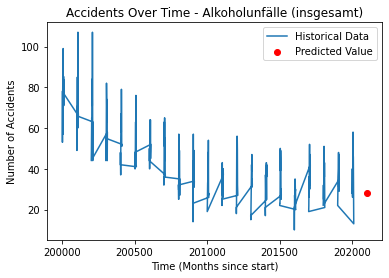

In [102]:
# Visualize the historical data and the predicted value
plt.plot( filtered_df['Month'], filtered_df['Value'], label='Historical Data')
plt.scatter([202101], [jan_2021_prediction[0]], color='red', label='Predicted Value')
plt.xlabel('Time (Months since start)')
plt.ylabel('Number of Accidents')
plt.title(f'Accidents Over Time - {category} ({accident_type})')
plt.legend()
plt.show()

In [151]:
df_after['Month_only']= extract_month(df_after)
df_after = df_after[['Year','Month','Month_only']]
df_after = df_after.drop_duplicates()

In [109]:


predictions=[]
for index, row in df_after.iterrows():
    prediction = model.predict([[row['Year'], row['Month_only']]])
    predictions.append(prediction[0])


In [110]:
predictions

[28.14,
 34.29,
 30.15,
 28.09,
 40.47,
 46.06,
 47.77,
 45.42,
 45.54,
 29.48,
 21.18,
 20.65,
 28.14,
 34.29,
 30.15,
 28.09,
 40.47,
 46.06,
 47.77,
 45.42,
 45.54,
 29.48,
 21.18,
 20.65,
 28.14,
 34.29,
 30.15,
 28.09,
 40.47,
 46.06,
 47.77,
 45.42,
 45.54,
 29.48,
 21.18,
 20.65]

In [113]:
df_after

,Year,Month,Month_only
0,2023,202301,1
1,2023,202302,2
2,2023,202303,3
3,2023,202304,4
4,2023,202305,5
5,2023,202306,6
6,2023,202307,7
7,2023,202308,8
8,2023,202309,9
9,2023,202310,10


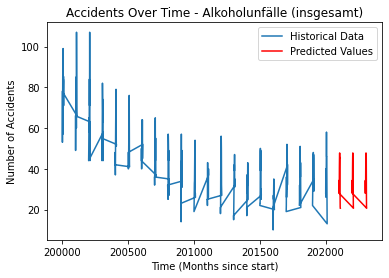

In [125]:
# Visualize the historical data and the predicted value
plt.plot( filtered_df['Month'], filtered_df['Value'], label='Historical Data')
plt.plot(df_after['Month'], predictions, color='red', label='Predicted Values')
plt.xlabel('Time (Months since start)')
plt.ylabel('Number of Accidents')
plt.title(f'Accidents Over Time - {category} ({accident_type})')
plt.legend()
plt.show()